#Pari Kashyap (Assignment_Supervised_Unsupervised)

Question: Select any dataset available on the internetand then
perform a detailed Exploratory Data Analysis (EDA) and then you have
to demonstrate the application of two models where one is
supervised and other is unsupervised and you have to create a
detailed report on the tasks performed mentioning the reason why
did you perform it and also you must train different models and
calculate model metrics and mention the final conclusion.
Below are the examples tasks to be performed on your dataset as per requirements –
1. Load the Data
2. Data Analysis
3. Data Cleaning
4. Visualizing and Understanding the Data
5. Find the Correlation Matrix
6. Hypothesis Testing
7. Feature Engineering/Scaling
8. Split the Data
9. Train Multiple Models using both Supervised and Unsupervised Learning
Algorithms (custom from scratch or scikit learn)
10. Evaluate the Models
11. Cross Validation and Fine Tuning
12. Model Experimentation and Tracking using mlflow(optional)
13. Ensemble Learning
14. Training the final best model and saving results with metrics.
15. Model Deployment using flask.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
plt.style.use('dark_background')

#Load the Data


#Data Analysis

In [2]:
df = pd.read_csv("Clean_Dataset.csv", index_col = "Unnamed: 0")
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


In [4]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [5]:
df.shape

(300153, 11)

In [6]:
df.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count()

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


In [7]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean()

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
...,...,...,...,...
172,Vistara,Mumbai,Bangalore,35029.880315
173,Vistara,Mumbai,Chennai,32181.946251
174,Vistara,Mumbai,Delhi,26402.695114
175,Vistara,Mumbai,Hyderabad,29497.578017


#Data Cleaning


In [8]:
df1=df.isnull().sum()
print(df1)

df = df.fillna(df.mean())
df

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


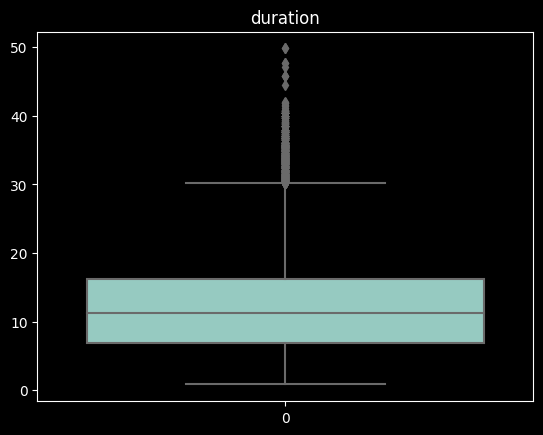

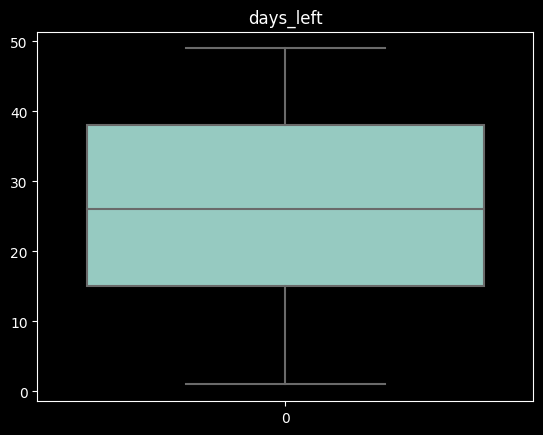

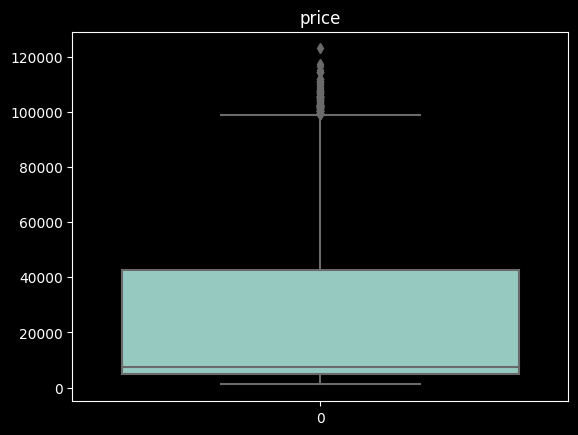

In [9]:
for col in df.columns:
    if df[col].dtype != object:
        plt.figure()
        sns.boxplot(df[col])
        plt.title(col)
        plt.show()

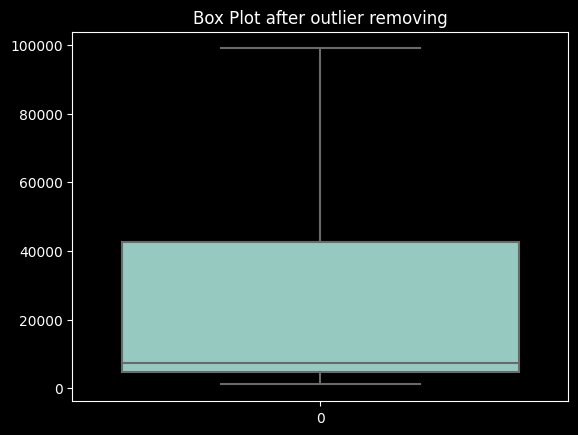

In [10]:
def drop_outliers (df, field_name):
  iqr=1.5*(np.percentile(df[field_name], 75) - np.percentile(df [field_name], 25))
  df.drop(df [df[field_name]> (iqr + np. percentile(df [field_name], 75))].index, inplace=True)
  df.drop(df[df[field_name] < (np. percentile (df [field_name], 25) - iqr)].index, inplace=True)
df2=df.copy()
drop_outliers (df2, 'price')
sns.boxplot (df2['price'])
plt.title("Box Plot after outlier removing")
plt.show()

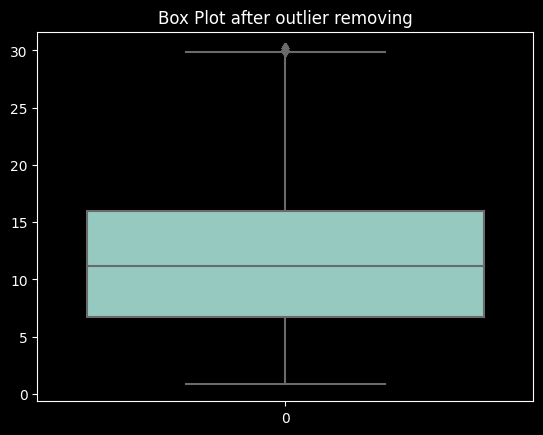

In [11]:
drop_outliers (df2, 'duration')
sns.boxplot (df2['duration'])
plt.title("Box Plot after outlier removing")
plt.show()

#Visualizing and Understanding the Data

## Visualization of popularity of the flights among customers

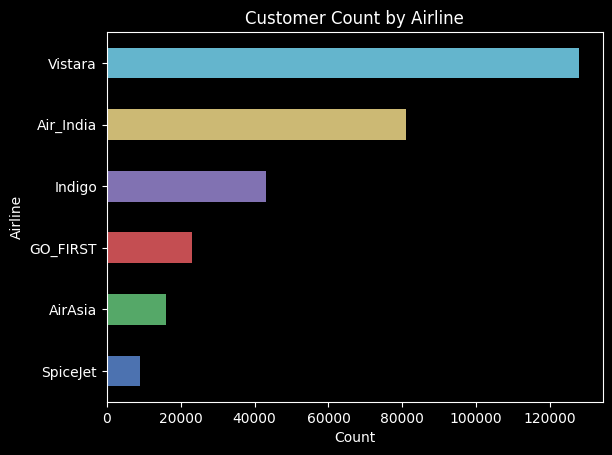

In [12]:
airline_counts = df['airline'].value_counts().sort_values(ascending=True)
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']

airline_counts.plot(kind='barh', color=colors)
plt.title("Customer Count by Airline")
plt.xlabel("Count")
plt.ylabel("Airline")
plt.show()

## Representation of number of different flights

In [13]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

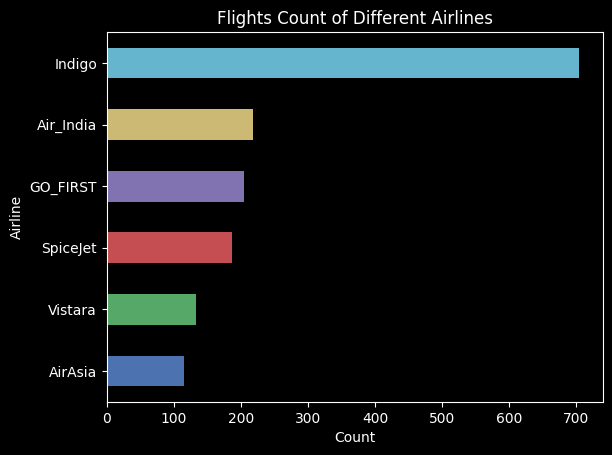

In [14]:
airline_counts = df1['airline'].value_counts().sort_values(ascending=True)
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']

airline_counts.plot(kind='barh', color=colors)
plt.title("Flights Count of Different Airlines")
plt.xlabel("Count")
plt.ylabel("Airline")
plt.show()

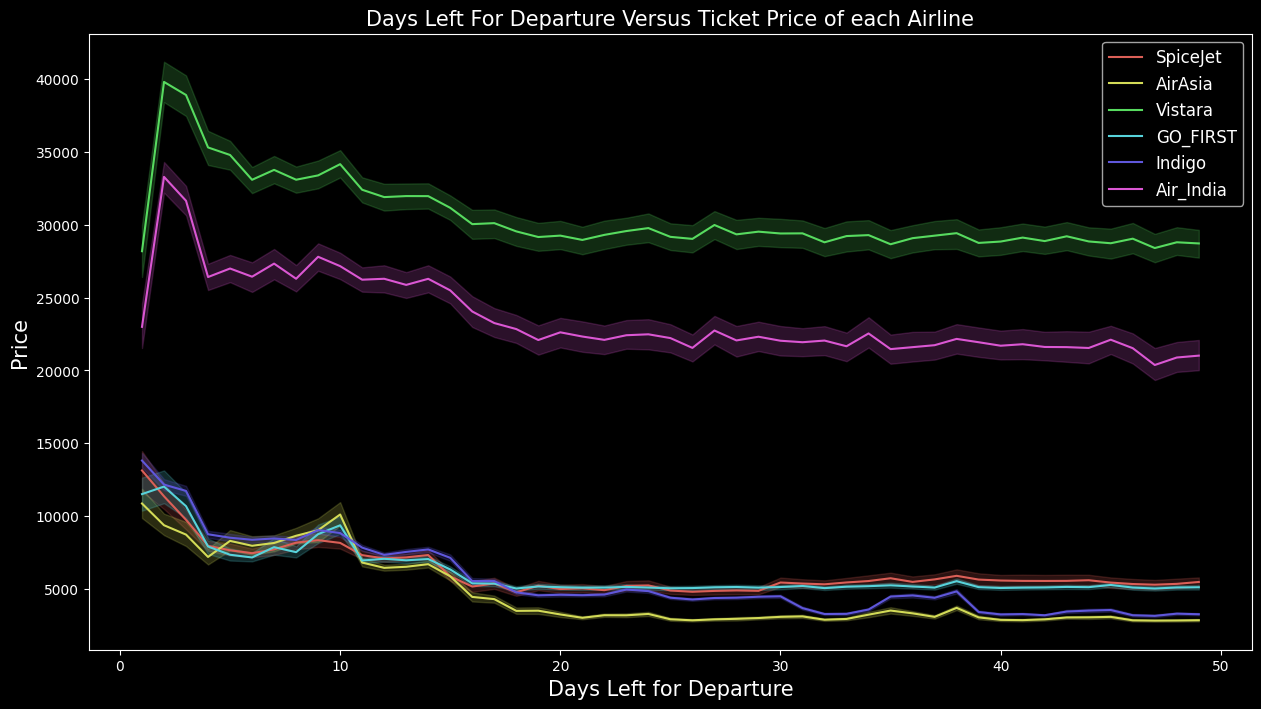

In [15]:
#lineplot
plt.figure(figsize=(15,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

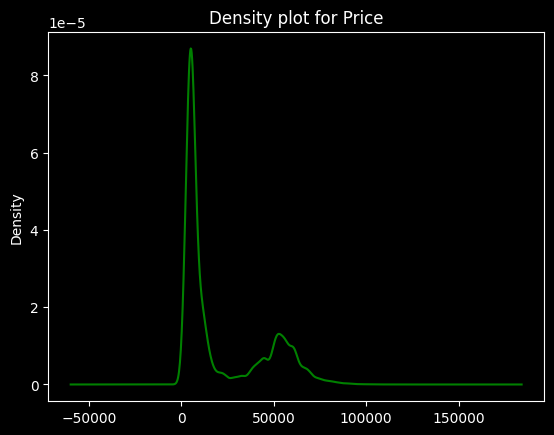

In [16]:
#density plot
df.price.plot.density(color='green')
plt.title('Density plot for Price')
plt.show()

In [17]:
# sns.distplot(df["airline"],bins=30);

In [18]:
# sns.jointplot(x='departure_time', y='arrival_time', data=df, kind='hex')

In [19]:
# sns.jointplot(x='airline', y='source_city', data=df, kind='hex')

In [20]:
# #jointplot with regression line
# sns.jointplot(x='airline', y='price', data=df, kind='reg')

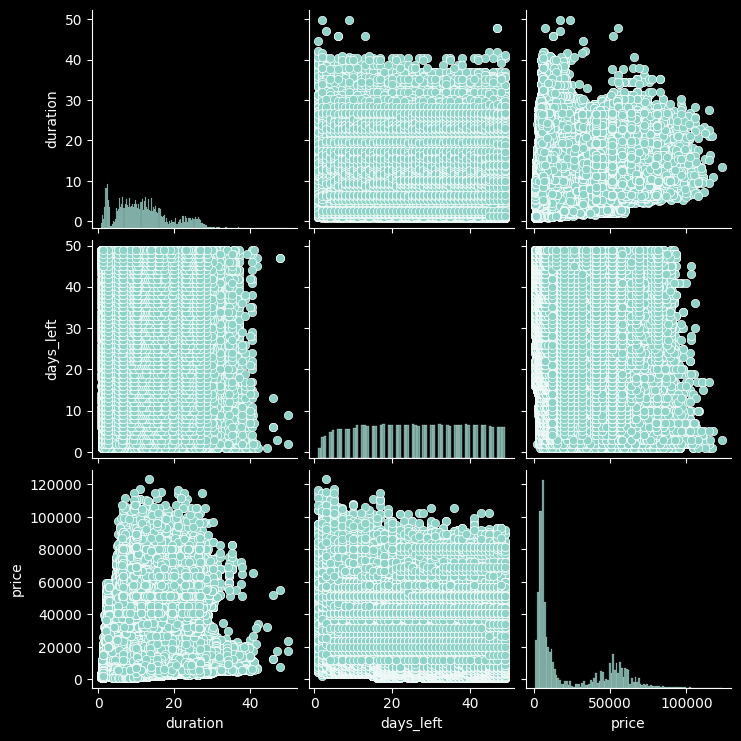

In [21]:
#pairplot
sns.pairplot(df)

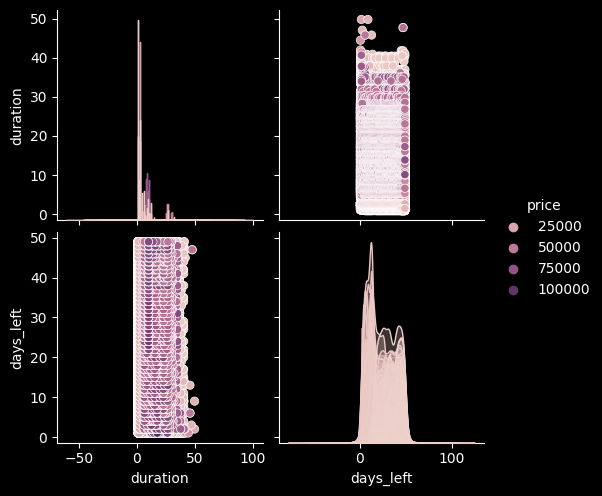

In [22]:
sns.pairplot(df,hue='price')

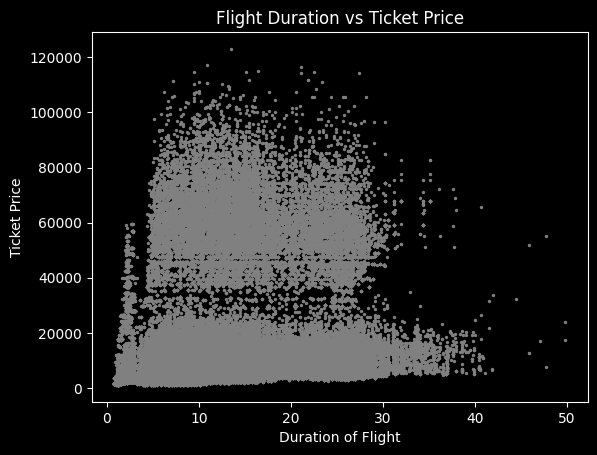

In [23]:
plt.scatter(df['duration'], df['price'], s=2, color= 'gray')
plt.title("Flight Duration vs Ticket Price")
plt.xlabel("Duration of Flight")
plt.ylabel("Ticket Price")
plt.show()

<Figure size 1000x600 with 0 Axes>

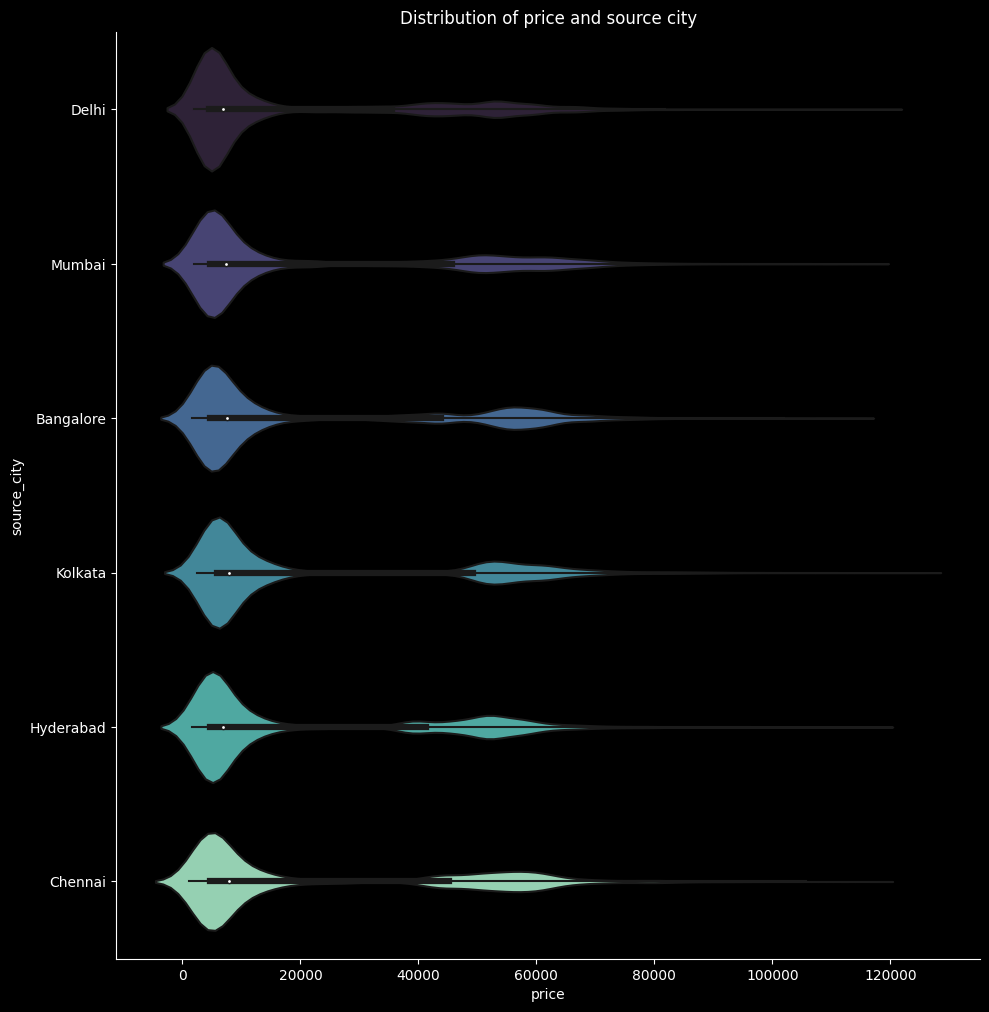

In [24]:
plt.figure(figsize = (10,6))
sns.catplot(data = df, x = "price", y = "source_city", kind =  "violin", height = 10, palette = "mako")
plt.title("Distribution of price and source city")
plt.show()

## Price variation with Airlines

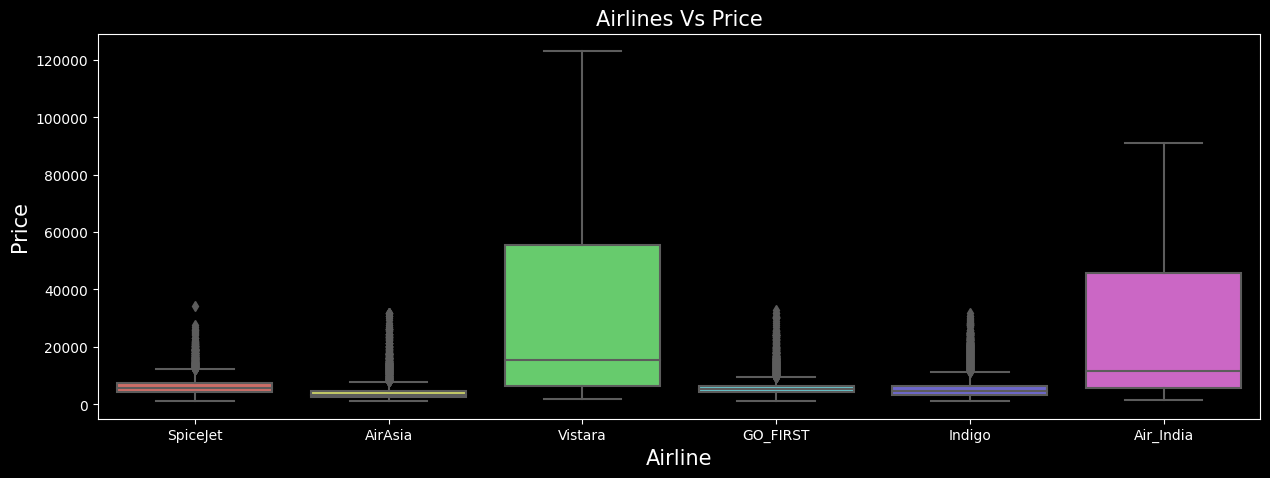

In [25]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

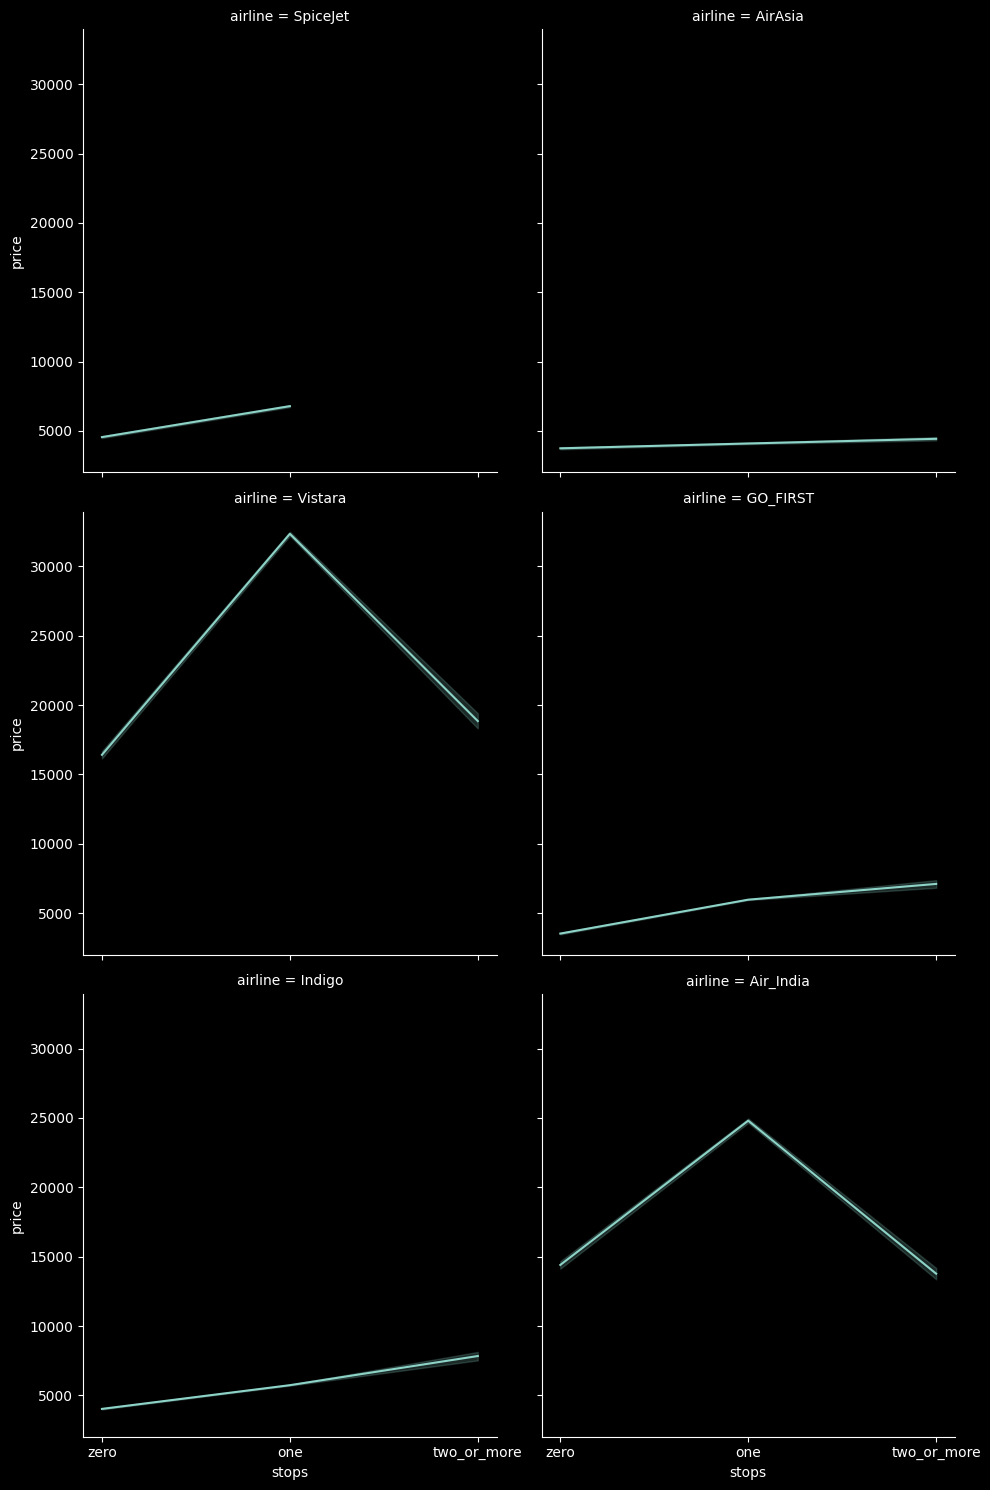

In [26]:
sns.relplot(col="airline", y="price", kind="line",x='stops', data=df, col_wrap=2)

##Comparision of class based on its prices

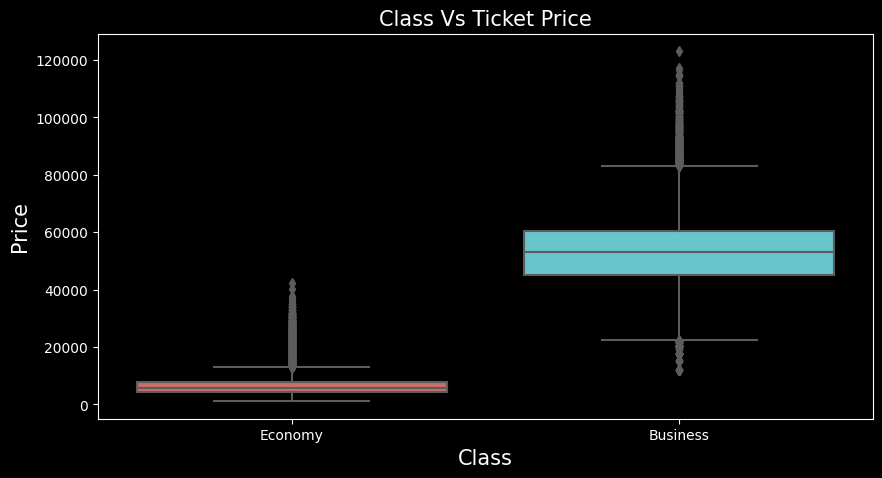

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

##Comparing prices based on different factors or conditions

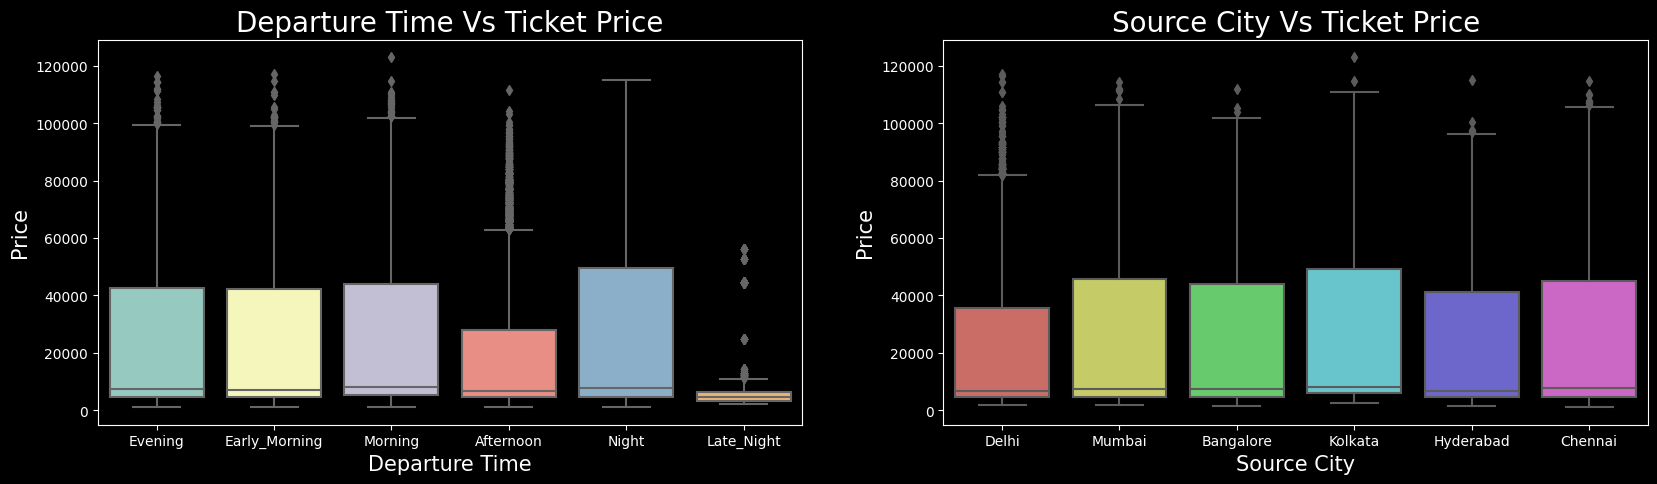

In [28]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='source_city',y='price',data=df,palette='hls')
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

##Most preferred airline Class

In [29]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

Economy     1560
Business     295
Name: class, dtype: int64

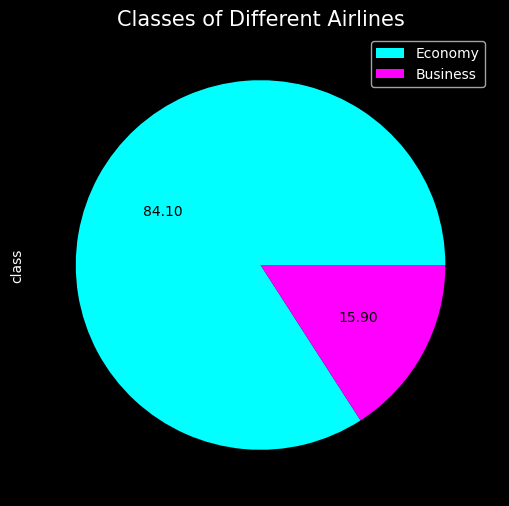

In [30]:
plt.figure(figsize=(6,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

#Find the Correlation Matrix

In [31]:
print(df.corr())
print("\n",df.corr().T)

           duration  days_left     price
duration   1.000000  -0.039157  0.204222
days_left -0.039157   1.000000 -0.091949
price      0.204222  -0.091949  1.000000

            duration  days_left     price
duration   1.000000  -0.039157  0.204222
days_left -0.039157   1.000000 -0.091949
price      0.204222  -0.091949  1.000000


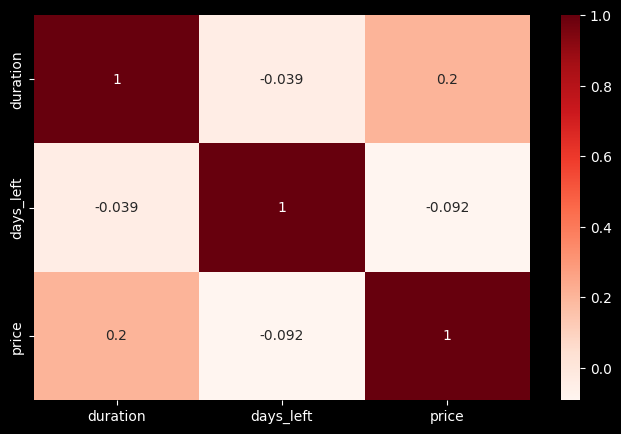

In [32]:
plt.figure(figsize=(8,5))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#Hypothesis Testing

In [33]:
from scipy import stats

sample = df['price'].values

null_mean = df['price'].mean()

t_statistic, p_value = stats.ttest_1samp(sample, null_mean)

print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

T-Statistic: 0.0
P-Value: 1.0
Fail to reject the null hypothesis


#Feature Engineering/Scaling

In [34]:
# Coverting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [35]:
# storing the Dependent Variables in X and Independent Variable in Y
df = df.drop('flight', axis=1)
x = df.iloc[:, :-1]
y=df['price']
print(x)

        airline  source_city  departure_time  stops  arrival_time  \
0             4            2               2      2             5   
1             4            2               1      2             4   
2             0            2               1      2             1   
3             5            2               4      2             0   
4             5            2               4      2             4   
...         ...          ...             ...    ...           ...   
300148        5            1               4      0             2   
300149        5            1               0      0             5   
300150        5            1               1      0             5   
300151        5            1               1      0             2   
300152        5            1               4      0             2   

        destination_city  class  duration  days_left  
0                      5      1      2.17          1  
1                      5      1      2.33          1  
2     

#Split the Data

In [36]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 9), (90046, 9), (210107,), (90046,))

In [37]:
# Scaling the values to convert the int values to Machine Languages
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [38]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


#ML Algorithms -

##Supervised Learning

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [40]:
modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelSVR, modelKNN, modelETR, modelRE, modelLO]

for models in MM:

    # Fit the model with train data

    models.fit(x_train, y_train)

    # Predict the model with test data

    y_pred = models.predict(x_test)
    #print(y_pred)

    # Print the model name

    print('Model Name: ', models)

    # Evaluation metrics for Regression analysis

    from sklearn import metrics
    print('y_pred:', y_pred)
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    from sklearn.metrics import confusion_matrix
    #print('Confusion matrix:', confusion_matrix(y_test,y_pred))

    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Evaluation of MAPE

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')

    # Calculate Adjusted R squared values

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'y_pred' : y_pred,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)
    #------------------------------------------------------------

Model Name:  LinearRegression()
y_pred: [ 4661.0306406  52896.1282138   7923.46583777 ... -1891.72032952
  6052.61177231 -3465.32047644]
Mean Absolute Error (MAE): 4633.176
Mean Squared Error (MSE): 49079940.275
Root Mean Squared Error (RMSE): 7005.708
R2_score: 0.904637
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage Error (MAPE): 43.98 %
Adj R Square:  0.904634
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
y_pred: [ 7366. 81284.  6195. ...  2410.  4390.  3393.]
Mean Absolute Error (MAE): 2298.993
Mean Squared Error (MSE): 27961969.901
Root Mean Squared Error (RMSE): 5287.908
R2_score: 0.94567
Root Mean Squared Log Error (RMSLE): 8.573
Mean Absolute Percentage Error (MAPE): 13.63 %
Adj R Square:  0.945668
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
y_pred: [ 5409.75 

#Pickle file

In [41]:
import pickle
print(modelETR)
pickle.dump(modelETR,open("model.pkl","wb"))

ExtraTreesRegressor()


#Evaluate the Models


In [42]:
models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','SVR','KNeighborsRegressor','ExtraTreesRegressor','Ridge Regression','Lasso Regression']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,ExtraTreesRegressor,0.969741,1833.838579,3946.219078,11.228034,1.557265e+07,8.280513,0.969742
1,KNeighborsRegressor,0.969304,1961.042314,3974.605879,11.887342,1.579749e+07,8.287681,0.969305
2,RandomForestRegressor,0.964342,2047.117622,4283.865462,12.284058,1.835150e+07,8.362611,0.964343
3,DecisionTreeRegressor,0.945668,2298.992974,5287.907895,13.629185,2.796197e+07,8.573178,0.945670
4,Lasso Regression,0.904635,4633.058301,7005.698274,43.979298,4.907981e+07,8.854479,0.904638
5,LinearRegression,0.904634,4633.175509,7005.707693,43.982424,4.907994e+07,8.854480,0.904637
6,Ridge Regression,0.904634,4633.196900,7005.704302,43.982746,4.907989e+07,8.854480,0.904637
7,SVR,0.590294,8947.913153,14520.869057,52.724383,2.108556e+08,9.583342,0.590306


##From the Above Results, the Top 2 Models by comparing Errors , Adj_R_Square and R2_Score values are:

##1. ExtraTreesRegressor
##2. 	KNeighborsRegressor
##3. RandomForestRegressor


##Unsupervised Learning

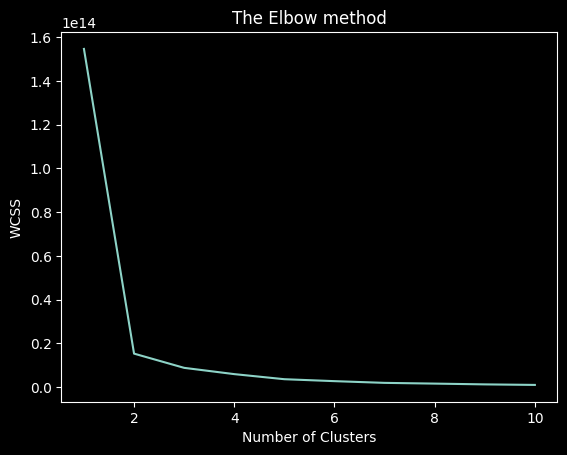

In [43]:
#K-means
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

plt.plot(range(1,11), wcss)
plt.title("The Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [44]:
wcss

[154634977293591.9,
 15338254309803.797,
 8835094392799.76,
 5967158365514.399,
 3642659536603.9526,
 2753699824917.4546,
 1970236169533.6924,
 1631256433699.8992,
 1277231306763.5376,
 1029703402236.5912]

In [55]:
X = df.iloc[:,:].values
km = KMeans(n_clusters=2)
y_means = km.fit_predict(X)

In [56]:
y_means

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [57]:
X[y_means == 1,1]

array([2., 2., 2., ..., 1., 1., 1.])

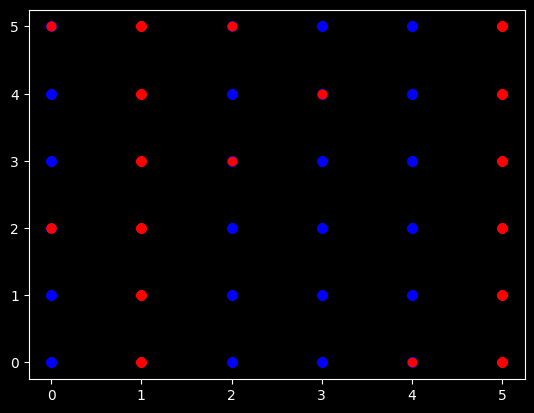

In [58]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')

#Cross Validation

In [49]:
from sklearn.model_selection import cross_val_score
model = ExtraTreesRegressor()
cv_scores = cross_val_score(model, x, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.5585183  0.50763669 0.57487544 0.89406363 0.20121546]
Average Cross-Validation Score: 0.5472619049789277


#Ensemble Learning


In [50]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
m = xgb.XGBRegressor()
m.fit(x_train, y_train)
# Make predictions on the test set
y_pred = m.predict(x_test)
from sklearn import metrics
print('y_pred:', y_pred)
print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

y_pred: [ 4534.591  66119.12    6658.6416 ...  2328.2092  4187.82    3882.5059]
Mean Absolute Error (MAE): 2491.384
Mean Squared Error (MSE): 18848939.007
Root Mean Squared Error (RMSE): 4341.536
R2_score: 0.963376
Root Mean Squared Log Error (RMSLE): 8.376


#Conclusion-
##The data indicates that the client is currently paying an appropriate amount for their flights given various factors such as travel class and destination.